# **Bioinformatics Project PARP-1 - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Abhiram Jyosyula



In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-01-23 17:27:53--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   183MB/s    in 0.4s    

2024-01-23 17:27:54 (183 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [ ]:
import numpy as np
!pip install rdkit
import rdkit as rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

MW     LogP  NumHDonors  NumHAcceptors
0     419.481  2.51880         2.0            5.0
1     464.547  1.96430         3.0            7.0
2     427.465 -1.32960         2.0            8.0
3     493.541  1.93430         2.0            8.0
4     458.544 -0.42400         2.0            8.0
...       ...      ...         ...            ...
3229  489.528  3.78084         2.0            7.0
3230  440.459  3.43460         2.0            6.0
3231  434.471  2.34740         1.0            4.0
3232  323.371  2.97930         3.0            2.0
3233  436.487  2.09130         2.0            5.0

[3234 rows x 4 columns]

In [ ]:
df

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL110347  CC(CC(=O)NCC(=O)c1ccc2ccccc2c1)n1c2c(c(=O)[nH]...   
1          CHEMBL108702  Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...   
2          CHEMBL418816  O=C(CCn1c2c(c(=O)[nH]c1=O)CCC2)NCC(=O)N1CCN(c2...   
3          CHEMBL108968  O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...   
4          CHEMBL430707  O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...   
...                 ...                                                ...   
3229      CHEMBL5209870  COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...   
3230      CHEMBL5197463  COc1cc(OC)c2c(=O)[nH]c(-c3cccc(Cc4n[nH]c(=O)c5...   
3231       CHEMBL521686  O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(...   
3232      CHEMBL1173055          CNCc1ccc(-c2[nH]c3cc(F)cc4c3c2CCNC4=O)cc1   
3233      CHEMBL4533690  O=C(NC1CCN(CC2CC2)C1)c1cc(Cn2c(=O)[nH]c(=O)c3c...   

     bioactivity_class  standard_value  
0         intermediate          5000.0  
1               active            20.0  
2         intermediate          3000.0  
3               active            30.0  
4               active            35.0  
...                ...             ...  
3229            active             4.6  
3230            active           197.0  
3231            active             8.0  
3232            active             0.8  
3233            active            13.3  

[3234 rows x 4 columns]

Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL110347  CC(CC(=O)NCC(=O)c1ccc2ccccc2c1)n1c2c(c(=O)[nH]...   
1          CHEMBL108702  Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...   
2          CHEMBL418816  O=C(CCn1c2c(c(=O)[nH]c1=O)CCC2)NCC(=O)N1CCN(c2...   
3          CHEMBL108968  O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...   
4          CHEMBL430707  O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...   
...                 ...                                                ...   
3229      CHEMBL5209870  COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...   
3230      CHEMBL5197463  COc1cc(OC)c2c(=O)[nH]c(-c3cccc(Cc4n[nH]c(=O)c5...   
3231       CHEMBL521686  O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(...   
3232      CHEMBL1173055          CNCc1ccc(-c2[nH]c3cc(F)cc4c3c2CCNC4=O)cc1   
3233      CHEMBL4533690  O=C(NC1CCN(CC2CC2)C1)c1cc(Cn2c(=O)[nH]c(=O)c3c...   

     bioactivity_class  standard_value       MW     LogP  NumHDonors  \
0         intermediate          5000.0  419.481  2.51880         2.0   
1               active            20.0  464.547  1.96430         3.0   
2         intermediate          3000.0  427.465 -1.32960         2.0   
3               active            30.0  493.541  1.93430         2.0   
4               active            35.0  458.544 -0.42400         2.0   
...                ...             ...      ...      ...         ...   
3229            active             4.6  489.528  3.78084         2.0   
3230            active           197.0  440.459  3.43460         2.0   
3231            active             8.0  434.471  2.34740         1.0   
3232            active             0.8  323.371  2.97930         3.0   
3233            active            13.3  436.487  2.09130         2.0   

      NumHAcceptors  
0               5.0  
1               7.0  
2               8.0  
3               8.0  
4               8.0  
...             ...  
3229            7.0  
3230            6.0  
3231            4.0  
3232            2.0  
3233            5.0  

[3234 rows x 8 columns]

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count    3.234000e+03
mean     3.673410e+06
std      2.083762e+08
min      2.000000e-02
25%      1.500000e+01
50%      7.900000e+01
75%      9.748750e+02
max      1.185000e+10
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-36-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL110347  CC(CC(=O)NCC(=O)c1ccc2ccccc2c1)n1c2c(c(=O)[nH]...   
1          CHEMBL108702  Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...   
2          CHEMBL418816  O=C(CCn1c2c(c(=O)[nH]c1=O)CCC2)NCC(=O)N1CCN(c2...   
3          CHEMBL108968  O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...   
4          CHEMBL430707  O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...   
...                 ...                                                ...   
3229      CHEMBL5209870  COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...   
3230      CHEMBL5197463  COc1cc(OC)c2c(=O)[nH]c(-c3cccc(Cc4n[nH]c(=O)c5...   
3231       CHEMBL521686  O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(...   
3232      CHEMBL1173055          CNCc1ccc(-c2[nH]c3cc(F)cc4c3c2CCNC4=O)cc1   
3233      CHEMBL4533690  O=C(NC1CCN(CC2CC2)C1)c1cc(Cn2c(=O)[nH]c(=O)c3c...   

     bioactivity_class       MW     LogP  NumHDonors  NumHAcceptors  \
0         intermediate  419.481  2.51880         2.0            5.0   
1               active  464.547  1.96430         3.0            7.0   
2         intermediate  427.465 -1.32960         2.0            8.0   
3               active  493.541  1.93430         2.0            8.0   
4               active  458.544 -0.42400         2.0            8.0   
...                ...      ...      ...         ...            ...   
3229            active  489.528  3.78084         2.0            7.0   
3230            active  440.459  3.43460         2.0            6.0   
3231            active  434.471  2.34740         1.0            4.0   
3232            active  323.371  2.97930         3.0            2.0   
3233            active  436.487  2.09130         2.0            5.0   

      standard_value_norm  
0                  5000.0  
1                    20.0  
2                  3000.0  
3                    30.0  
4                    35.0  
...                   ...  
3229                  4.6  
3230                197.0  
3231                  8.0  
3232                  0.8  
3233                 13.3  

[3234 rows x 8 columns]

In [ ]:
df_norm.standard_value_norm.describe()

count    3.234000e+03
mean     4.013808e+04
std      1.760901e+06
min      2.000000e-02
25%      1.500000e+01
50%      7.900000e+01
75%      9.748750e+02
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-32-62152670485b>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL110347  CC(CC(=O)NCC(=O)c1ccc2ccccc2c1)n1c2c(c(=O)[nH]...   
1          CHEMBL108702  Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...   
2          CHEMBL418816  O=C(CCn1c2c(c(=O)[nH]c1=O)CCC2)NCC(=O)N1CCN(c2...   
3          CHEMBL108968  O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...   
4          CHEMBL430707  O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...   
...                 ...                                                ...   
3229      CHEMBL5209870  COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...   
3230      CHEMBL5197463  COc1cc(OC)c2c(=O)[nH]c(-c3cccc(Cc4n[nH]c(=O)c5...   
3231       CHEMBL521686  O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(...   
3232      CHEMBL1173055          CNCc1ccc(-c2[nH]c3cc(F)cc4c3c2CCNC4=O)cc1   
3233      CHEMBL4533690  O=C(NC1CCN(CC2CC2)C1)c1cc(Cn2c(=O)[nH]c(=O)c3c...   

     bioactivity_class       MW     LogP  NumHDonors  NumHAcceptors     pIC50  
0         intermediate  419.481  2.51880         2.0            5.0  5.301030  
1               active  464.547  1.96430         3.0            7.0  7.698970  
2         intermediate  427.465 -1.32960         2.0            8.0  5.522879  
3               active  493.541  1.93430         2.0            8.0  7.522879  
4               active  458.544 -0.42400         2.0            8.0  7.455932  
...                ...      ...      ...         ...            ...       ...  
3229            active  489.528  3.78084         2.0            7.0  8.337242  
3230            active  440.459  3.43460         2.0            6.0  6.705534  
3231            active  434.471  2.34740         1.0            4.0  8.096910  
3232            active  323.371  2.97930         3.0            2.0  9.096910  
3233            active  436.487  2.09130         2.0            5.0  7.876148  

[3234 rows x 8 columns]

In [ ]:
df_final.to_csv('df_final.csv', index= False)

In [ ]:
df_final.pIC50.describe()

count    3234.000000
mean        6.896351
std         1.304682
min         1.000000
25%         6.011053
50%         7.102373
75%         7.823909
max        10.698970
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

molecule_chembl_id                                   canonical_smiles  \
1          CHEMBL108702  Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...   
3          CHEMBL108968  O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...   
4          CHEMBL430707  O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...   
5          CHEMBL321638  COc1ccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...   
6          CHEMBL108316  O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...   
...                 ...                                                ...   
3229      CHEMBL5209870  COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...   
3230      CHEMBL5197463  COc1cc(OC)c2c(=O)[nH]c(-c3cccc(Cc4n[nH]c(=O)c5...   
3231       CHEMBL521686  O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(...   
3232      CHEMBL1173055          CNCc1ccc(-c2[nH]c3cc(F)cc4c3c2CCNC4=O)cc1   
3233      CHEMBL4533690  O=C(NC1CCN(CC2CC2)C1)c1cc(Cn2c(=O)[nH]c(=O)c3c...   

     bioactivity_class       MW     LogP  NumHDonors  NumHAcceptors     pIC50  
1               active  464.547  1.96430         3.0            7.0  7.698970  
3               active  493.541  1.93430         2.0            8.0  7.522879  
4               active  458.544 -0.42400         2.0            8.0  7.455932  
5               active  479.558  2.39070         2.0            7.0  7.823909  
6               active  460.520 -1.63400         2.0           10.0  7.301030  
...                ...      ...      ...         ...            ...       ...  
3229            active  489.528  3.78084         2.0            7.0  8.337242  
3230            active  440.459  3.43460         2.0            6.0  6.705534  
3231            active  434.471  2.34740         1.0            4.0  8.096910  
3232            active  323.371  2.97930         3.0            2.0  9.096910  
3233            active  436.487  2.09130         2.0            5.0  7.876148  

[2823 rows x 8 columns]

In [ ]:
df_2class.to_csv('df_2class.csv', index= False)

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

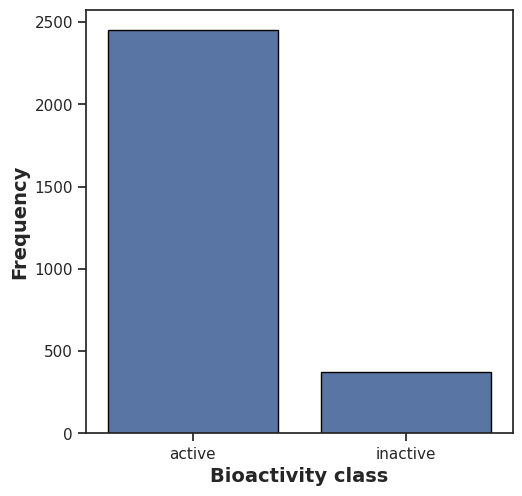

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

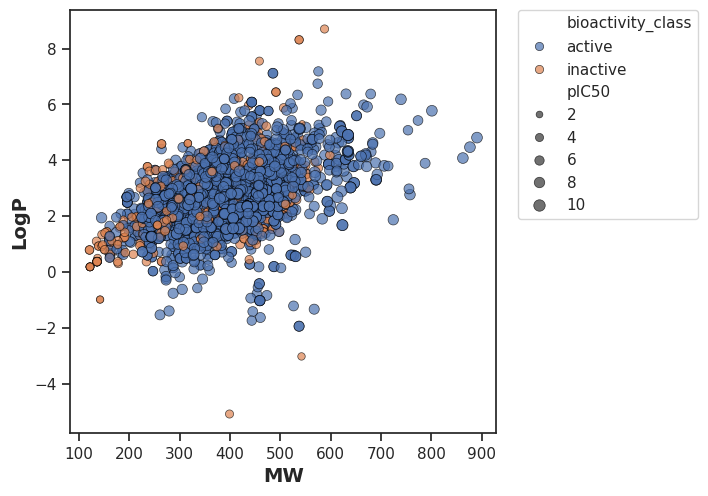

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

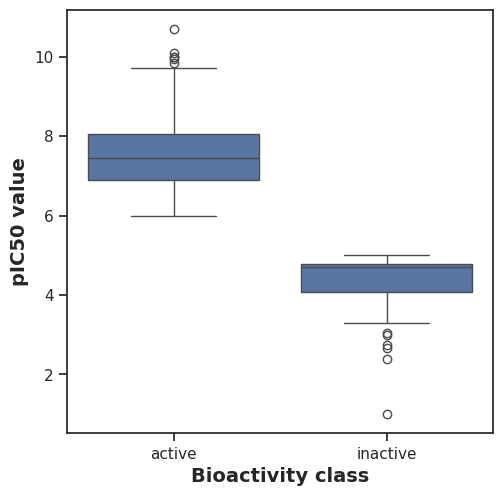

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

Descriptor  Statistics              p  alpha  \
0      pIC50    907610.0  1.072088e-211   0.05   

                       Interpretation  
0  Different distribution (reject H0)

#### **MW**

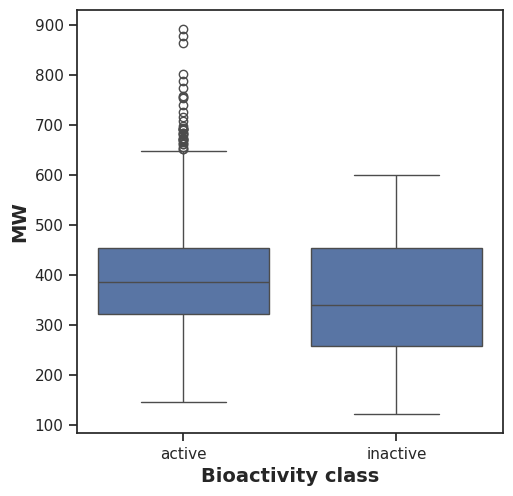

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

Descriptor  Statistics             p  alpha  \
0         MW    551214.0  2.644213e-11   0.05   

                       Interpretation  
0  Different distribution (reject H0)

#### **LogP**

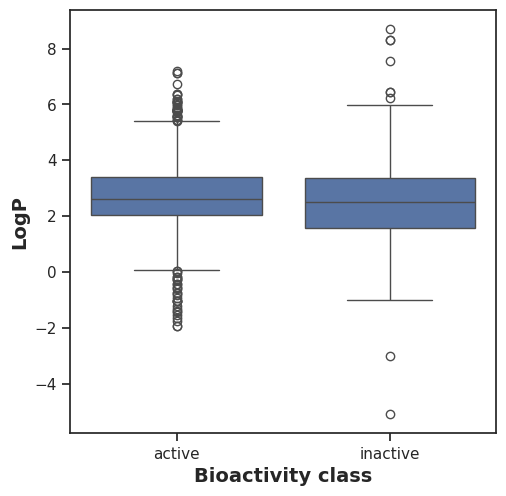

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

Descriptor  Statistics         p  alpha                      Interpretation
0       LogP    497180.5  0.002998   0.05  Different distribution (reject H0)

#### **NumHDonors**

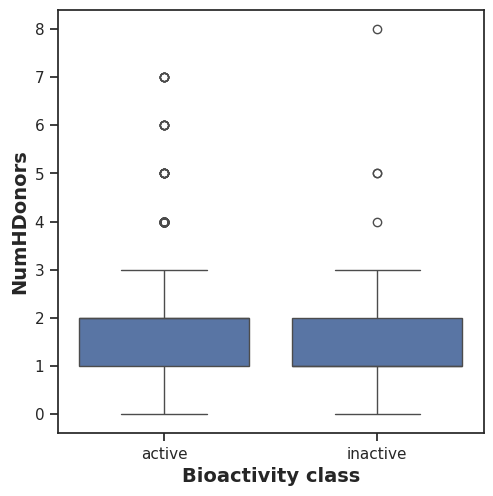

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

Descriptor  Statistics             p  alpha  \
0  NumHDonors    588152.5  3.958410e-23   0.05   

                       Interpretation  
0  Different distribution (reject H0)

#### **NumHAcceptors**

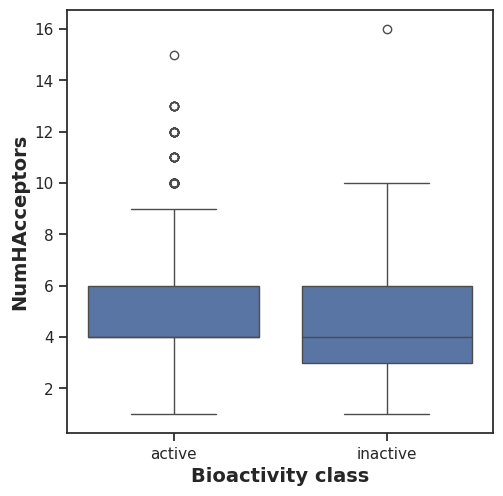

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

Descriptor  Statistics             p  alpha  \
0  NumHAcceptors    532589.5  3.944836e-08   0.05   

                       Interpretation  
0  Different distribution (reject H0)

#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: bioactivity_data_preprocessed.csv (deflated 84%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: plot_MW.pdf (deflated 36%)
  adding: mannwhitneyu_LogP.csv (deflated 10%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
